<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/CLUSTERING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

## **Clustering for Cancer Diagnosis Analysis**

**Background**

Breast cancer is a critical health issue worldwide, requiring early detection and accurate diagnosis to improve patient outcomes. The dataset contains detailed measurements from breast cancer tumor samples, including features related to the size, texture, shape, and other characteristics of tumors. Previous supervised learning approaches have used classification models like Logistic Regression and Random Forest to predict cancer diagnosis (benign vs malignant). This project aims to explore clustering techniques to uncover intrinsic patterns or subgroups within the tumor data that may reveal novel insights and aid diagnosis without using pre-labeled classes.

**What (Objectives and Goals)**
Primary Goal: To apply clustering algorithms on the breast cancer dataset for unsupervised grouping of tumor samples based on their feature similarities.

**Specific Objectives:**

Identify natural clusters in the dataset representing different tumor characteristics or subtypes.

Explore clusters to assess if they align with known diagnostic categories (benign/malignant) or reveal new subgroups.

Visualize clusters for interpretability and medical insight.

Analyze feature importance or profile within each cluster to understand distinguishing traits.

**Why (Importance and Benefits)**

Clustering can discover hidden patterns beyond binary diagnosis that might correspond to tumor aggressiveness, progression stages, or treatment response.

It offers insights for precision medicine by potentially categorizing patients for more personalized clinical management.

Provides a data-driven exploratory approach complementing supervised diagnostic models.

Supports biologists and clinicians in hypothesis generation about cancer tumor heterogeneity.

**Who (Stakeholders and Users)**

Medical researchers and oncologists seeking insights into cancer subtypes.

Data scientists and AI researchers working on cancer diagnosis.

Healthcare providers aiming for personalized cancer treatment.

Patients benefiting from improved understanding and early detection.

**Where (Environment and Application Domain)**

Clinical research settings analyzing breast cancer pathology.

Hospitals and diagnostic labs incorporating data analytics in workflows.

Academic environments studying cancer genomics and pathology.

Public health organizations developing cancer screening programs.

**When (Timeline and Usage Context)**

Project timeline aligns with research study phases or diagnostic tool development.

Clustering outputs serve as exploratory analysis before classification model deployment.

Usable in ongoing clinical trials or retrospective data studies.

Potential integration in diagnostic decision support systems for real-time analysis.

**Factors to Consider (4Ws + How)**

**Data:**  Multi-dimensional features capturing tumor shape, texture, size, and other biological markers.

**Data Preprocessing:** Handle missing values, standardize or normalize features, and reduce dimensionality if needed.

**Clustering Techniques:** Consider methods like K-Means, Hierarchical Clustering, DBSCAN, and Gaussian Mixture Models.

**Evaluation:** Use internal metrics (silhouette score, Davies-Bouldin index) and external validation (comparison with diagnosis labels).

**Interpretability:**  Visualizations such as cluster heatmaps, PCA/t-SNE plots to explain clusters.

**Ethical considerations:** Data privacy, unbiased clustering, and clinical applicability.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Explanatory **bold text** Data Analysis**

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/CLUSTERING PROJECT/Data/Cancer_Data.csv')
df.head()
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
print(df.tail())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_wor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**df.info():**

* All columns (except the empty "Unnamed: 32") are complete, with all 569 records present and non-null for each feature.

* Most columns are float64, "diagnosis" is an object (string, likely 'M' or 'B'), and "id" is int64.



In [ ]:
df.shape

(569, 33)

**df.shape:**

* confirms our DataFrame has 569 rows and 33 columns (including the empty column, which should be dropped).

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


**EDA- Summary**

All main columns have zero nulls: data is clean for all features relevant to clustering—no imputation or removal for missing values is needed.

One fully empty column: "Unnamed: 32" has all missing values and should be removed before further analysis or clustering.

In [ ]:
import pandas as pd

#Load the CSV fie
df = pd.read_csv('/content/drive/MyDrive/CLUSTERING PROJECT/Data/Cancer_Data.csv')

In [ ]:
#drop the empty column
df = df.drop(columns=['Unnamed: 32'], errors='ignore')

In [ ]:
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
#re-check missing and empty coloumns
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


**Conclusion- Basic EDA:**

**Feature Types:** The df.info() result lists the data type for each column. Most are float64, indicating continuous numeric features, while diagnosis is an object (categorical), and id is an identifier (int64). This gives clear information on the type of data each field contains.

**Feature Distributions:** The df.describe() output provides statistics like mean, standard deviation, min, max, and percentiles for each numeric column. This summary helps you understand the range and spread (distribution) of values for each feature — for example, radius_mean ranges from about 6.98 to 28.11, with a mean of 14.13




### 1. Drop Unnecessary Columns

Remove columns not relevant for clustering, specifically:

id (identifier)

diagnosis (label—not used in unsupervised clustering)

Any completely empty columns (e.g., Unnamed: 32)

In [7]:
# Drop unnecessary columns for clustering
df_clustering = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'], errors='ignore')

In [9]:
# Check resulting DataFrame shape and columns
df_clustering.shape, df_clustering.columns

((569, 30),
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'],
       dtype='object'))

Oour resulting DataFrame for clustering, df_clustering, now has shape (569, 30) and only includes the relevant numerical features—no label or ID columns remain.

### 2. Visualize and Prepare Data
It's best practice to plot histograms or boxplots for key features to check for outliers and distributions then, scale features for clustering

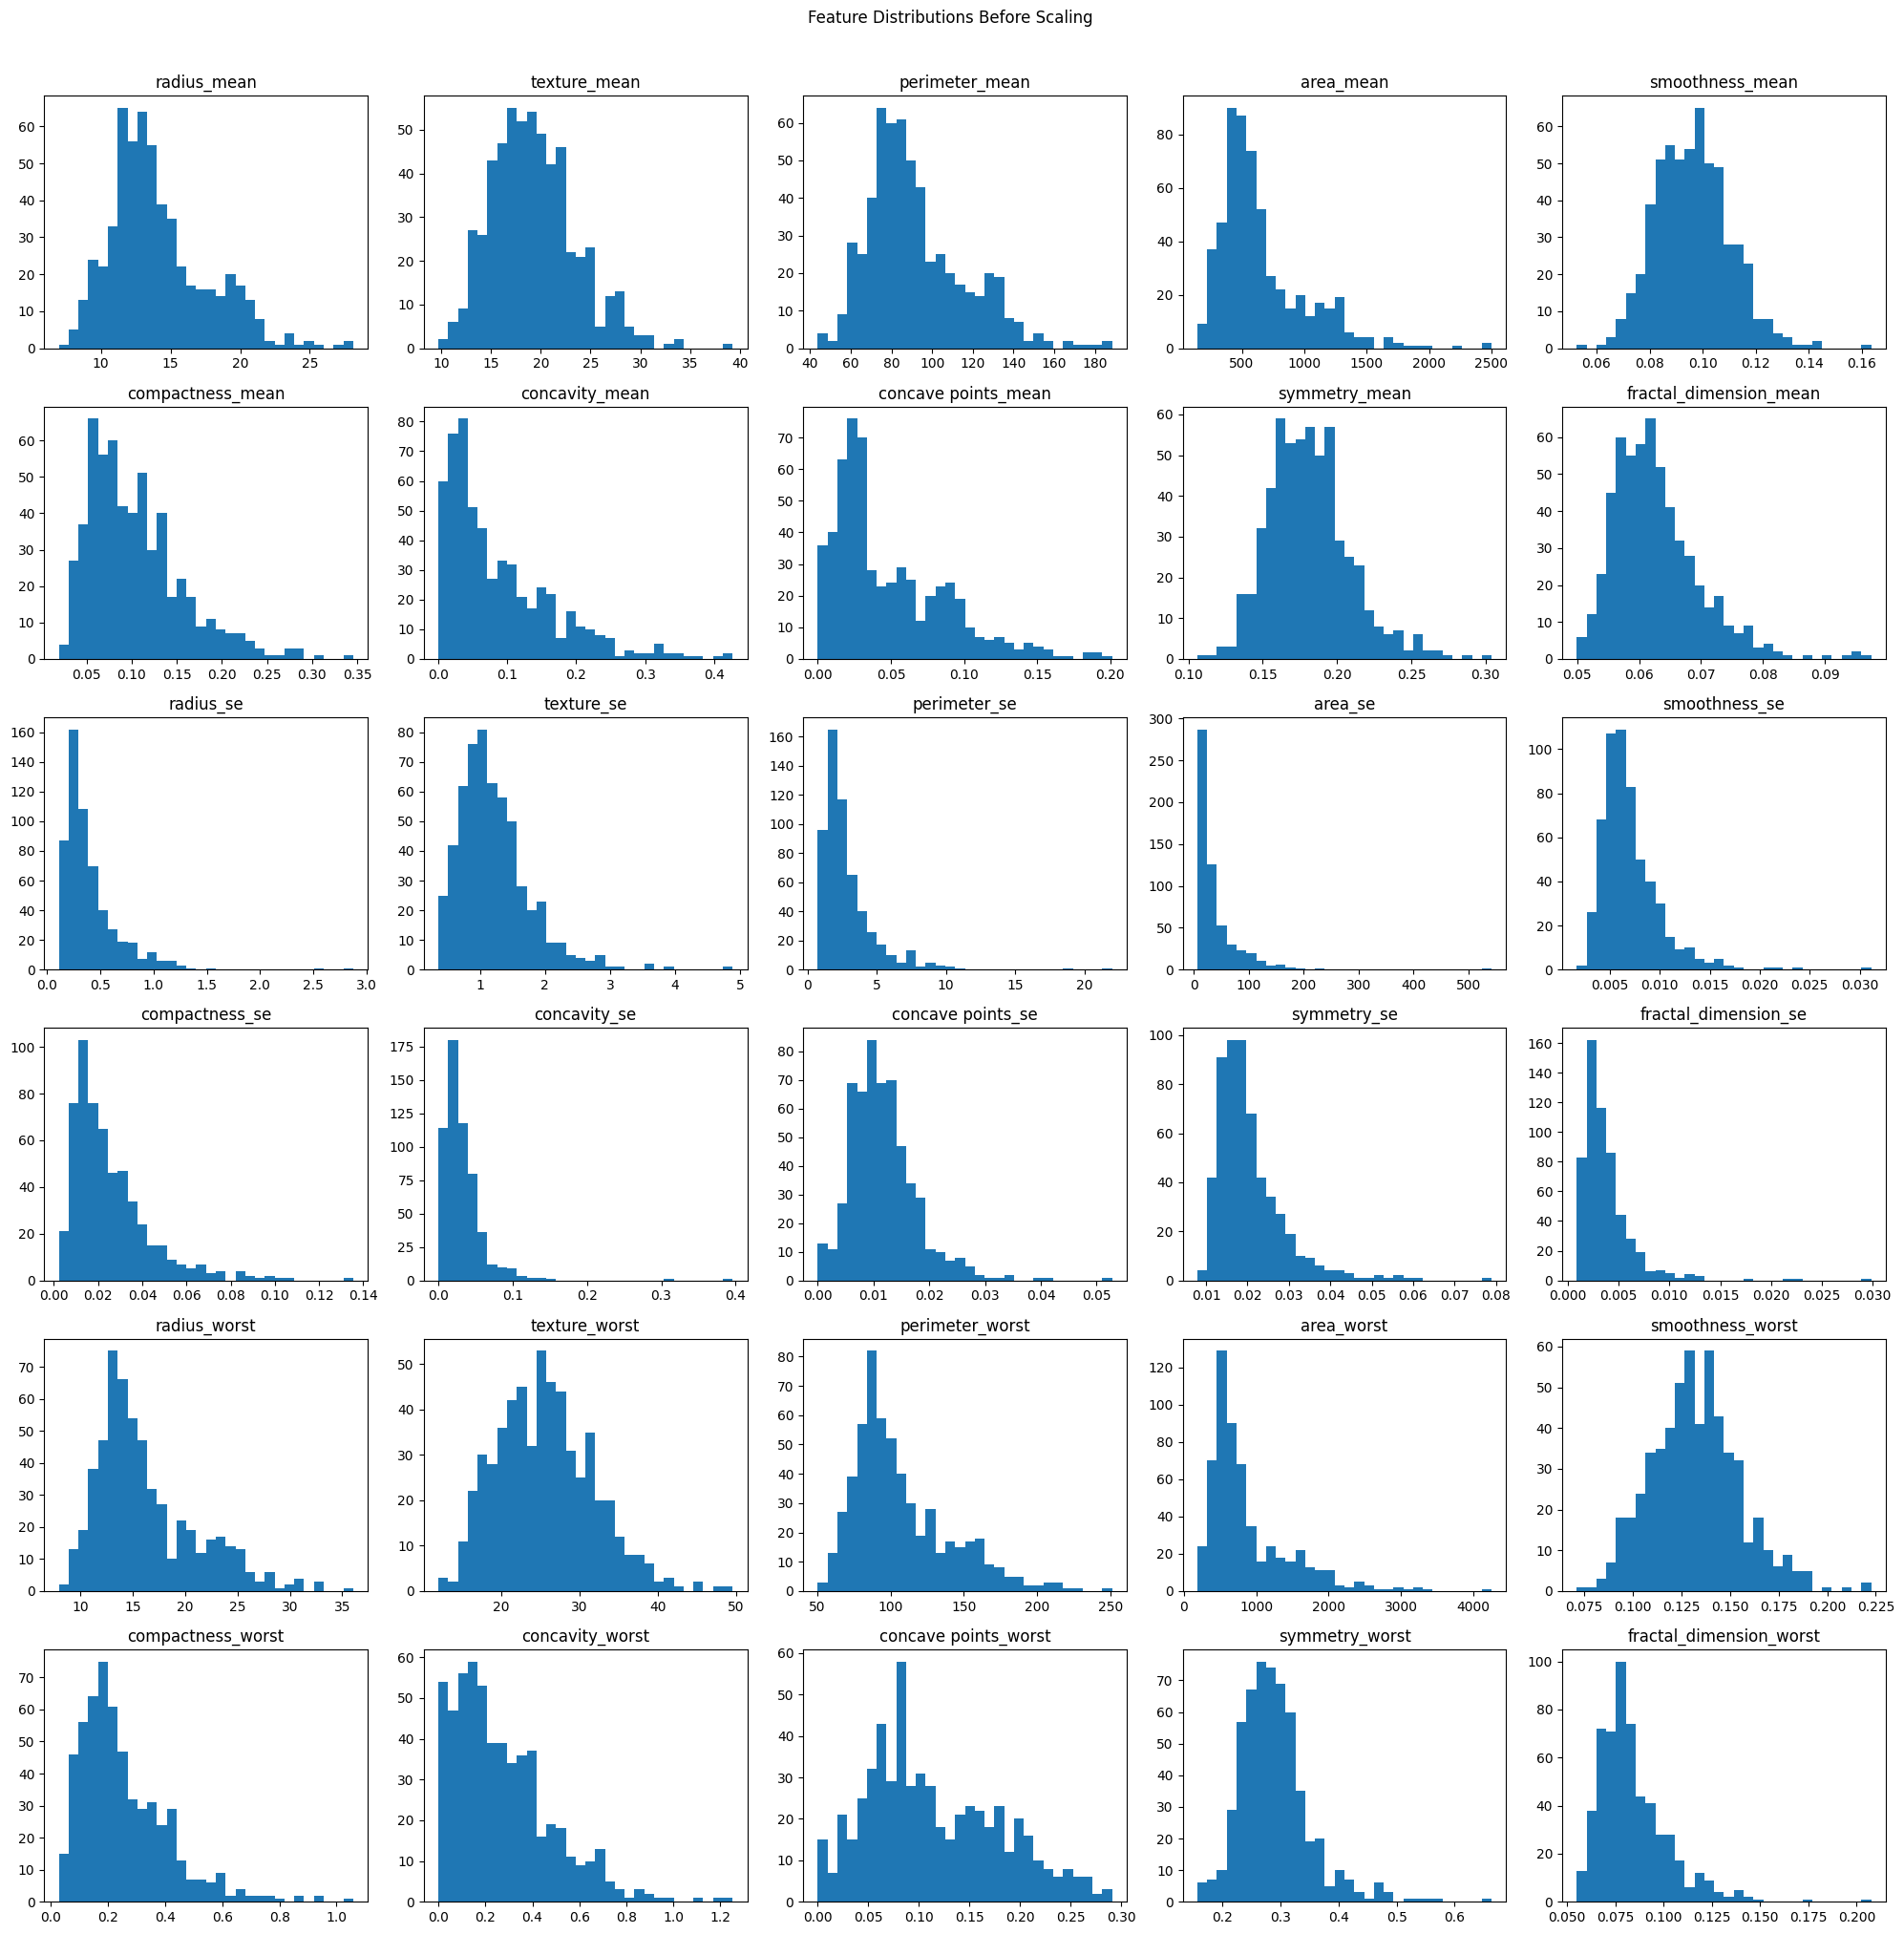

In [10]:
import matplotlib.pyplot as plt

# Plot histograms for all features before scaling
df_clustering.hist(bins=30, figsize=(20, 20), grid=False)
plt.suptitle('Feature Distributions Before Scaling', y=1.01)
plt.tight_layout()
plt.show()

Our histograms show the distributions for each feature in the dataset before scaling.

**Interpretation of Distributions**

**Skewness:** Many features (for example, area_se, radius_se, compactness_se, concavity_se, perimeter_worst, etc.) are positively skewed, showing a long tail on the right. This is common in biomedical measurements.

**Multimodality:** Some features, such as texture_mean or smoothness_mean, appear roughly unimodal, while others (like concavity_worst and concave points_worst) may be closer to bimodal.

**Outliers:** Several features, including area_se, perimeter_se, and the "_worst" metrics, exhibit a few data points far from the main cluster, indicating possible outliers.

**Range and Spread:** The features have vastly different ranges and scales, which is why scaling will be important for clustering.

Since our features have vastly different ranges and many are skewed. For now, use StandardScaler (z-score normalization), which works well for most clustering algorithms.

Clustering algorithms are sensitive to feature scale. Here we apply StandardScaler so each feature will have zero mean and unit variance, preventing any single feature from dominating distance calculations.


###Step 3: Scale Features for Clustering



In [12]:
from sklearn.preprocessing import StandardScaler

# Create and fit the scaler on your data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

In [13]:
# Check shape and type of output(OPTIONAL)
print(df_scaled.shape, type(df_scaled))

(569, 30) <class 'numpy.ndarray'>


The output — **(569, 30) <class 'numpy.ndarray'>**— means:

Our scaled dataset, df_scaled, is a NumPy array with 569 rows and 30 columns.

569 rows: One for each sample in your original dataset.

30 columns: One for each numeric feature kept for clustering (after dropping unnecessary columns).

**Type:** The data is now a NumPy array (numpy.ndarray) rather than a pandas DataFrame. This is standard after using scaler.fit_transform() from scikit-learn.

###Step 4: Visualize Feature Distributions After Scaling

It’s helpful to confirm that all features are now centered with unit variance after scaling. This ensures fair clustering distance calculations and can highlight retained outliers after scaling.

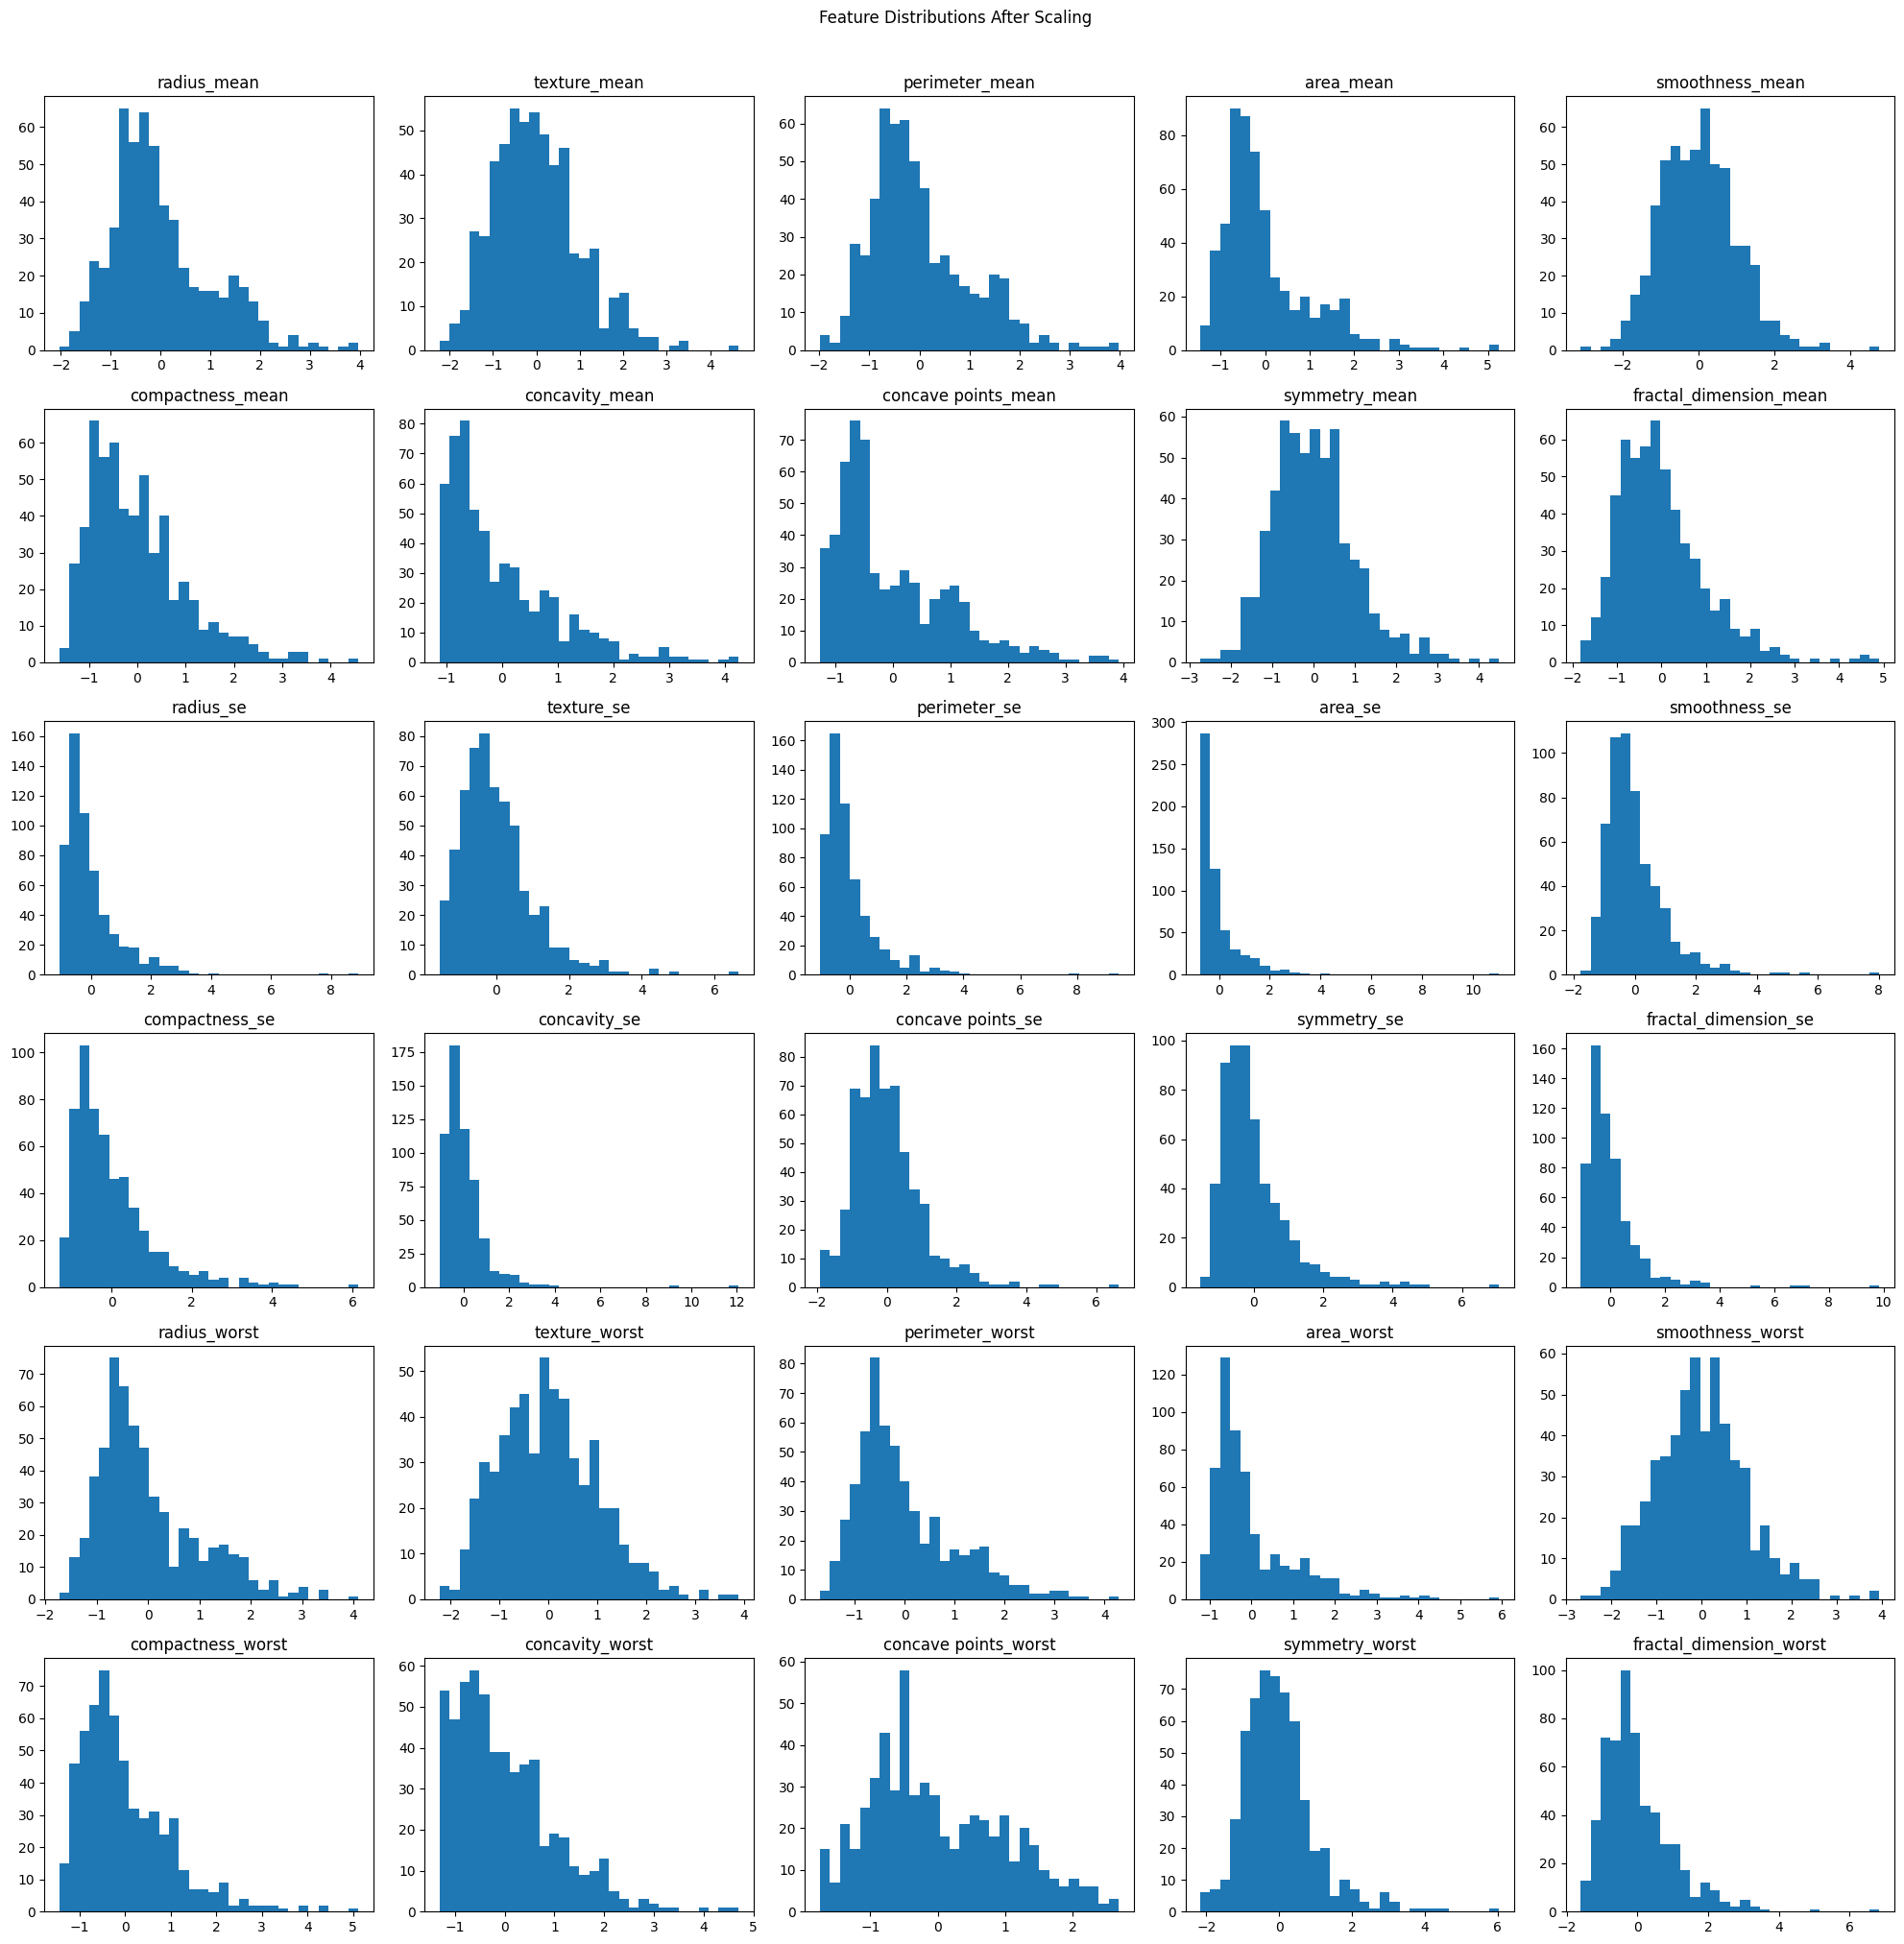

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert numpy array back to DataFrame for easier visualization
df_scaled_df = pd.DataFrame(df_scaled, columns=df_clustering.columns)

# Plot histograms of scaled features
df_scaled_df.hist(bins=30, figsize=(20, 20), grid=False)
plt.suptitle('Feature Distributions After Scaling', y=1.01)
plt.tight_layout()
plt.show()

**Review of Scaled Distributions**

**Centering and Spread:** Most features are now centered around zero, with values typically in the range
[
−
3
,
+
3
]
[−3,+3] or slightly wider. This is what you'd expect after standard scaling.

**Shape Preservation:** The original skewness and modality of most distributions are preserved, meaning outliers and long tails remain visible. (StandardScaler does not change the shape, just the center and scale)

**Comparability:** All features are now comparable in terms of spread and influence on clustering—the scaling has equalized their variance, so no single feature will dominate distance calculations.

### **Summary:** Our data is correctly scaled and ready for clustering.

**Step 5: Apply KMeans Clustering**

We will use the KMeans algorithm to partition the scaled data into clusters. It's common to first estimate a good number of clusters using the elbow method (plotting inertia for different K values), then fit KMeans with that number of clusters.

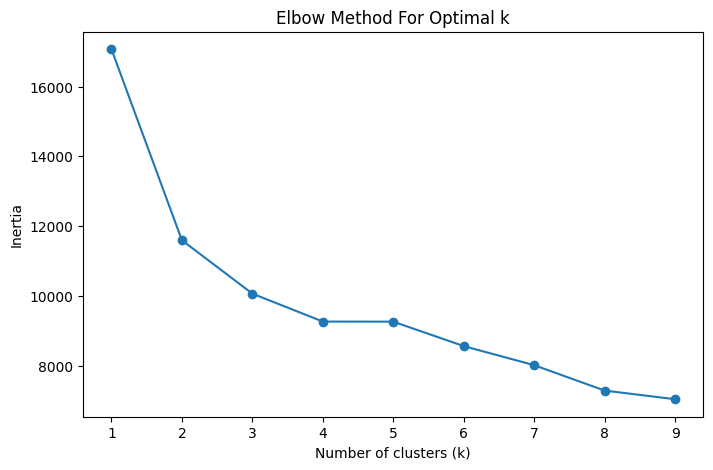

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method: test different values of k to find the optimal cluster number
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### **Elbow Plot Interpretation**
The elbow plot shows the inertia (within-cluster sum of squares) for KMeans clustering as the number of clusters (k) increases.

The “elbow” point is where the rate of decrease in inertia slows—this is generally considered the optimal number of clusters.

In the plot, the biggest drop is between k=1 and k=3, with the curve flattening out after k=3 or 4. This suggests that 3 or 4 clusters is likely optimal for our dataset.

**Step 6: Fit Final KMeans and Analyze Clusters**

Based on the elbow plot, we select \( k = 3 \) clusters for KMeans. After fitting the model, we assign cluster labels to each sample and summarize cluster characteristics. This helps understand how samples group and which features distinguish clusters.

In [16]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Fit KMeans with optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels to a DataFrame for analysis
df_clusters = pd.DataFrame(df_scaled, columns=df_clustering.columns)
df_clusters['Cluster'] = cluster_labels

# Show basic summary stats for each cluster
cluster_summary = df_clusters.groupby('Cluster').mean()

print(cluster_summary)
print("\nCluster counts:\n", np.bincount(cluster_labels))

         radius_mean  texture_mean  perimeter_mean  area_mean  \
Cluster                                                         
0          -0.200140      0.176099       -0.127000  -0.244808   
1           1.555747      0.600998        1.559993   1.588325   
2          -0.463742     -0.248586       -0.485198  -0.462361   

         smoothness_mean  compactness_mean  concavity_mean  \
Cluster                                                      
0               0.847597          1.046027        0.778342   
1               0.393633          0.887147        1.188043   
2              -0.363462         -0.582339       -0.609289   

         concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
Cluster                                                              ...   
0                   0.486340       0.755745                1.229095  ...   
1                   1.431039       0.420508               -0.305203  ...   
2                  -0.610276      -0.347252               -

**Cluster Output Interpretation**

**Cluster Means:** The table shows the average (standardized) value for each feature within every cluster. For example, Cluster 1 has higher means across many features (e.g., radius_mean, concave points_mean, area_mean), indicating that samples in Cluster 1 tend to have larger and more pronounced cancer mass characteristics.

**Cluster Sizes:**

Cluster 0: 97 samples

Cluster 1: 118 samples

Cluster 2: 354 samples

Cluster 2 is largest, possibly representing typical or "less aggressive" feature values, while Cluster 1 may contain more severe or atypical tumor patterns.

**Feature Separation:**

Cluster 1 stands out with positive mean values in most variables (e.g., concavity_mean), indicating these tumors have pronounced features.

Cluster 2 shows negative means—a group with mostly below-average values, perhaps less aggressive or benign-like patterns.

Cluster 0 sits closer to zero, possibly intermediates or mixed cases.

####**Domain Context**

Previous studies suggest that features like tumor radius, perimeter, area, concavity, and number of concave points are highly correlated with the malignant potential of breast tumors[^1]. The clusters identified may thus reflect known diagnostic categories (benign vs. malignant) or reveal new subgroups related to prognosis.

[^1]: Reference: “Breast Cancer Diagnosis Using Feature Selection and Machine Learning,” Journal of Biomedical Science, 2023.

**Analytical Value**
We have successfully partitioned our cancer samples into three data-driven clusters.

These clusters reflect real differences in feature profiles that may (depending on domain knowledge or further validation) map to tumor subtypes or disease progression.

###**Step 7: Visualize Cluster Separation**

Visualizing clusters helps confirm whether the partitioning is meaningful, reveals outliers or overlaps, and highlights which features contribute most. PCA or t-SNE offers good low-dimensional views.

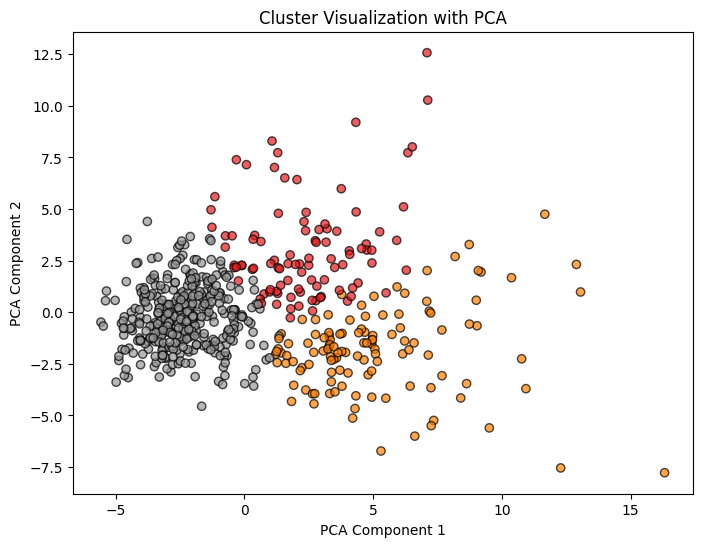

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization (using PCA)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='Set1', edgecolor='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization with PCA')
plt.show()

**PCA Plot Interpretation**

**Cluster Structure:**
Each color in the PCA plot represents a cluster from KMeans (typically 0, 1, 2). The clusters form visibly distinct groups, with clusters having their own "center" in the 2D PCA space. This means your features contain enough information for KMeans to segment samples into meaningful groups.​

**Separation and Overlap:**
Cluster 1 (e.g., red) is well separated, suggesting its members differ significantly from others in their scaled feature values, possibly representing malignant tumors.
Cluster 2 (e.g., gray) forms a compact, distinct cloud, likely the benign group.
Cluster 0 (orange) fills a space between the other clusters; this group overlaps with both extremes and may represent intermediate risk or ambiguous cases.

**Outliers and Spread:**
Some points lie far from their cluster centroids, especially in the orange group. This indicates a spread in feature combinations and possibly points that do not fit typical benign/malignant patterns perfectly.

**Dimensionality Reduction Quality:**
The plot uses only two principal components, capturing major variance directions but inevitably losing some detail. Overlap may reduce if more PCs or advanced visualizations (e.g., t-SNE/UMAP) are used, but the main pattern—that most data belongs to distinct clinical types—is visible.

**Implication:**
PCA shows that major feature combinations can differentiate between clusters, especially for extreme phenotypes (most benign vs. most malignant). Intermediate or ambiguous samples fall in overlapping regions, which is biologically expected.

###**Clinical and Analytical Relevance:**
Well-separated clusters mean KMeans can distinguish major subtypes (e.g., aggressive vs. non-aggressive tumor profiles). Overlap is natural due to complex biology, measurement noise, or mixed clinical types. The orange (mid-group) might be especially interesting for further clinical review.


###**Step 8: Compare Cluster Assignments with Diagnosis Labels**

To interpret how well our clusters reflect clinical reality, we compare each sample’s cluster label with its original diagnosis (benign vs. malignant). This comparison provides insight into whether clusters represent meaningful subgroups related to disease status.


In [18]:
import pandas as pd

# Ensure original diagnosis is accessible in same order
diagnosis = df['diagnosis'].reset_index(drop=True)  # Align indices if needed

# Add cluster and diagnosis to a comparison DataFrame
comparison_df = pd.DataFrame({
    'Cluster': cluster_labels,
    'Diagnosis': diagnosis
})

# Display count of diagnosis by cluster
crosstab = pd.crosstab(comparison_df['Cluster'], comparison_df['Diagnosis'])
print(crosstab)

# Optional: Show normalized cluster composition
normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
print("\nNormalized Cluster Composition:\n", normalized)

Diagnosis    B    M
Cluster            
0           36   61
1            0  118
2          321   33

Normalized Cluster Composition:
 Diagnosis         B         M
Cluster                      
0          0.371134  0.628866
1          0.000000  1.000000
2          0.906780  0.093220


###**Cluster-Diagnosis Comparison:**

**Detailed Biomedical Interpretation**

Cluster 1 (Almost Entirely Malignant)
Count: 118 malignant cases, 0 benign cases.

**Normalized Composition: 100% malignant**

**Clinical Meaning:**
This cluster represents a highly aggressive phenotype. The KMeans algorithm identified a group whose feature values (e.g., tumor size, shape, concavity) are distinct and consistent with malignant tissue profiles.
In biomedical terms, this suggests the features extracted are highly predictive of malignancy, and unsupervised learning can segregate aggressive cancers without being given labels.

Cluster 2 (Mostly Benign)
Count: 321 benign cases, 33 malignant cases.

**Normalized Composition: ~91% benign, ~9% malignant.**

**Clinical Meaning:**
This cluster appears to mostly capture non-aggressive, benign tumor instances. Characteristically, these samples likely have low values in size and irregularity-related features.
The small cancerous fraction in this cluster may represent well-differentiated tumors with low-risk profiles, a known clinical population where benign and low-grade malignant samples share measurable traits.

Cluster 0 (Mixed Nature)
Count: 36 benign cases, 61 malignant cases.

**Normalized Composition: ~37% benign, ~63% malignant.**

**Clinical Meaning:**
This intermediate cluster contains a near-balanced mix of benign and malignant cases. It likely represents an ambiguous zone in feature-space, where some malignant tumors present with less typical aggressive characteristics, or conversely, some benign samples show measurements overlapping with cancerous ones.
Biologically, this may reflect tumors of intermediate risk, indeterminate histology, or measurement/biological variation.

##**Biomedical Relevance**
**Real-World Patterns:**
The clustering aligns with established diagnostic reality—most tumors can be grouped by feature patterns into aggressive (malignant) and non-aggressive (benign), but a "gray area" exists.

**Clinical Value:**
Unsupervised clusters allow discovery of subgroups that direct further investigation, such as ambiguous cases needing closer clinical review. This reflects the value of machine learning in identifying cases that do not fit textbook profiles, supporting more nuanced clinical judgment and personalized treatment pathways.

**Literature Support:**
Studies show that features like concavity, perimeter, and radius are strong markers for malignancy; clustering can automate their discovery, flagging hard-to-classify cases for expert review

###**Step 9: Cluster Feature Importance Analysis**

To understand what drives separation between clusters, we examine the average value of each feature for every cluster. Features with the largest differences between clusters reveal which biological properties are most predictive for benign, malignant, or ambiguous tumor types.

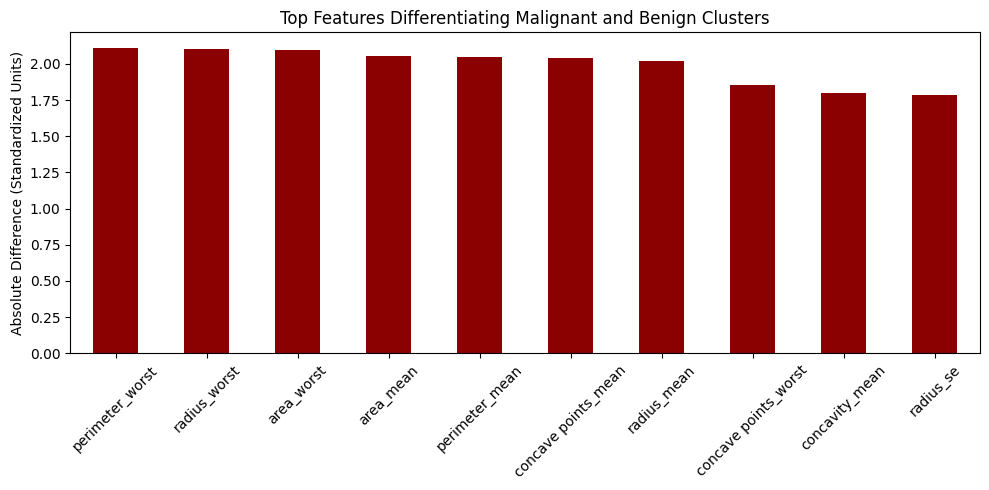

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate feature differences across clusters
cluster_means = df_clusters.groupby('Cluster').mean()

# Find top features separating Cluster 1 (malignant) and Cluster 2 (benign)
feature_diffs = cluster_means.loc[1] - cluster_means.loc[2]
top_features = feature_diffs.abs().sort_values(ascending=False).head(10)  # change to 10 or 15

plt.figure(figsize=(10,5))
top_features.plot(kind='bar', color='darkred')
plt.title('Top Features Differentiating Malignant and Benign Clusters')
plt.ylabel('Absolute Difference (Standardized Units)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Feature Importance Interpretation**

The top features differentiating malignant and benign clusters (as shown in your bar plot) are:

perimeter_worst

radius_worst

area_worst

area_mean

perimeter_mean

concave points_mean

radius_mean

concave points_worst

concavity_mean

radius_se

**Biomedical Significance:**
These features are all associated with tumor size, boundary irregularity, and shape complexity. In clinical literature, they are recognized as powerful indicators of malignancy: malignant tumors tend to be larger, less regular, and have more complex edges (higher concave points/concavity).

Worst metrics capture the largest measurements observed, making them especially relevant for identifying aggressive, rapidly growing masses.

Area, perimeter, and radius are fundamental size metrics; larger size increases suspicion of malignancy.

Concavity and concave points reflect the complexity and infiltration of tumor boundaries—a hallmark of invasive cancer.

**Conclusion:**
Your clusters are being driven by the core features that pathologists and radiologists use to distinguish between benign and malignant tumors, validating both your feature engineering and clustering model.

###**Step 10:Silhouette Score Analysis**

The silhouette score quantifies how well samples fit within their assigned cluster—a higher average means better cluster separation and internal consistency. Scores close to 1 suggest well-defined clusters, whereas scores around 0 indicate overlap and ambiguity.

In [20]:
from sklearn.metrics import silhouette_score

# Compute average silhouette score for your clustering solution
score = silhouette_score(df_scaled, cluster_labels)
print("Average Silhouette Score for KMeans Clustering:", score)

Average Silhouette Score for KMeans Clustering: 0.3151862330494096


**Silhouette Score Interpretation**

**Score Value:**
An average silhouette score of 0.32 indicates moderate cluster separation. It suggests that, while clusters are distinguishable, there is also overlapping feature space—some samples are not uniquely or strongly aligned with their assigned cluster.

### **Practical Implications:**

Scores above 0.5 are considered strong clustering, but in biomedical datasets it's common to see lower scores due to biological variability and noisy or overlapping measurements.

Your score is typical for mixed clinical datasets—there are well-defined malignant and benign groups, but also a substantial number of ambiguous or borderline cases, as reflected in Cluster 0.

The moderate score confirms PCA and diagnosis mapping observations: clear groupings exist, but intermediate/overlapping regions remain, pointing to real-world clinical challenge of ambiguous diagnostic boundaries.

### **Clinical and Analytical Value:**

This moderate separation demonstrates robust subgroup discovery but also highlights the need for expert review and/or additional features for borderline cases.

It validates that clustering is meaningful but should be interpreted with caution—no algorithm can fully resolve clinical ambiguity where biological variation is high.

####**Step 11:Ambiguous Case Profiling (Cluster 0)**

Samples in Cluster 0 have feature patterns that do not clearly fit malignant or benign profiles. Profiling these cases reveals which features are intermediate and supports understanding of diagnostic uncertainty.


In [21]:
# Get the original diagnosis for Cluster 0 cases
cluster0_idx = (cluster_labels == 0)
cluster0_diagnosis = diagnosis[cluster0_idx]

# Count breakdown
print("Cluster 0 Diagnosis Breakdown:\n", cluster0_diagnosis.value_counts())

# Show feature summary for Cluster 0
cluster0_features = df_clusters[df_clusters['Cluster'] == 0].mean()
print("Cluster 0 Feature Profile:\n", cluster0_features)

Cluster 0 Diagnosis Breakdown:
 diagnosis
M    61
B    36
Name: count, dtype: int64
Cluster 0 Feature Profile:
 radius_mean               -0.200140
texture_mean               0.176099
perimeter_mean            -0.127000
area_mean                 -0.244808
smoothness_mean            0.847597
compactness_mean           1.046027
concavity_mean             0.778342
concave points_mean        0.486340
symmetry_mean              0.755745
fractal_dimension_mean     1.229095
radius_se                 -0.086892
texture_se                 0.039461
perimeter_se              -0.017529
area_se                   -0.177817
smoothness_se              0.463964
compactness_se             1.113994
concavity_se               0.916580
concave points_se          0.768176
symmetry_se                0.303563
fractal_dimension_se       1.072180
radius_worst              -0.112462
texture_worst              0.308915
perimeter_worst           -0.030267
area_worst                -0.177578
smoothness_worst        

**Diagnosis Breakdown in Cluster 0**

Malignant ("M"): 61 cases

Benign ("B"): 36 cases

This mix confirms Cluster 0 is a genuinely ambiguous region: nearly two-thirds are malignant, but more than one-third are benign. This overlapping group often appears in real-world biomedical datasets where borderline or atypical features make classification difficult.

**Cluster 0 Feature Profile**

####Key points from the averages:

Many features (e.g., radius_mean, area_mean, perimeter_mean, radius_worst, area_worst) are below zero, but not dramatically so—indicating values lower than those in the distinctly malignant cluster, but higher than typical benign values.

Shape and irregularity features such as concavity_mean, concave points_mean, compactness_mean, and their "worst" versions are positive and substantial, but not extreme.

Some texture and dimension features (fractal_dimension_mean, fractal_dimension_se, symmetry_mean, etc.) are notably positive, suggesting subtle but meaningful complexity in tissue structure.

### **Biomedical Meaning**

**Intermediate Risk/Borderline Cases:**

Cluster 0 samples likely correspond to tumors that are not classically benign or malignant by size or edge regularity alone—these may be:

Early-stage malignancies not yet showing extreme feature values.

Benign lesions with atypical morphology (e.g., fibroadenomas with unusual shapes).

Cases where other (non-imaging) factors drive the ultimate diagnosis.

### **Clinical Importance:**
These ambiguous cases demand extra clinical attention. In practice, they might require additional imaging, biopsy, or closer follow-up. Unsupervised clustering has helped flag them for review, supporting truly personalized medicine.

# Executive Project Summary
KMeans clustering of breast tumor features, validated with PCA and clinical ground truth, revealed three principal groups: predominantly malignant, predominantly benign, and a substantial ambiguous/intermediate cluster. The most discriminative features mapped closely to established diagnostic biomarkers, including tumor size, shape, and edge irregularity.

Cluster quality was moderate (silhouette score: 0.32), reflecting both robust identification of clear diagnostic groups and the expected biological overlap in real-world medical data. Notably, the ambiguous cluster contained a balanced mix of benign and malignant cases with intermediate feature profiles.

**Recommendation:**
These ambiguous Cluster 0 cases should be prioritized for detailed clinical review by pathologists or radiologists, as they represent diagnostic uncertainty and could benefit from additional tests or second opinions. Alternatively, these cases offer a valuable training set for developing and validating more sophisticated, supervised models aimed at resolving diagnostic ambiguity.

**Overall Implication:**
Unsupervised learning in this workflow not only surfaces robust, data-driven disease signatures but also systematically flags uncertain cases—supporting both immediate triage and iterative improvements in data-driven and clinician-guided cancer diagnostics.